In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/config/workspace/dataset/indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [11]:
df.duplicated().sum()

13

In [12]:
df = df.drop_duplicates()

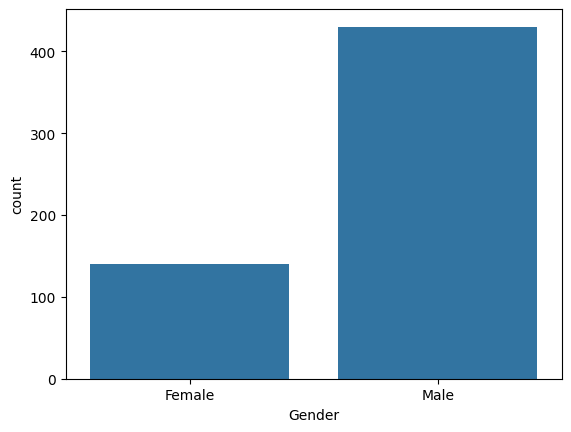

In [13]:
sns.countplot(data=df, x=df['Gender'])
plt.show()

In this above graph Imbalanced data pressent

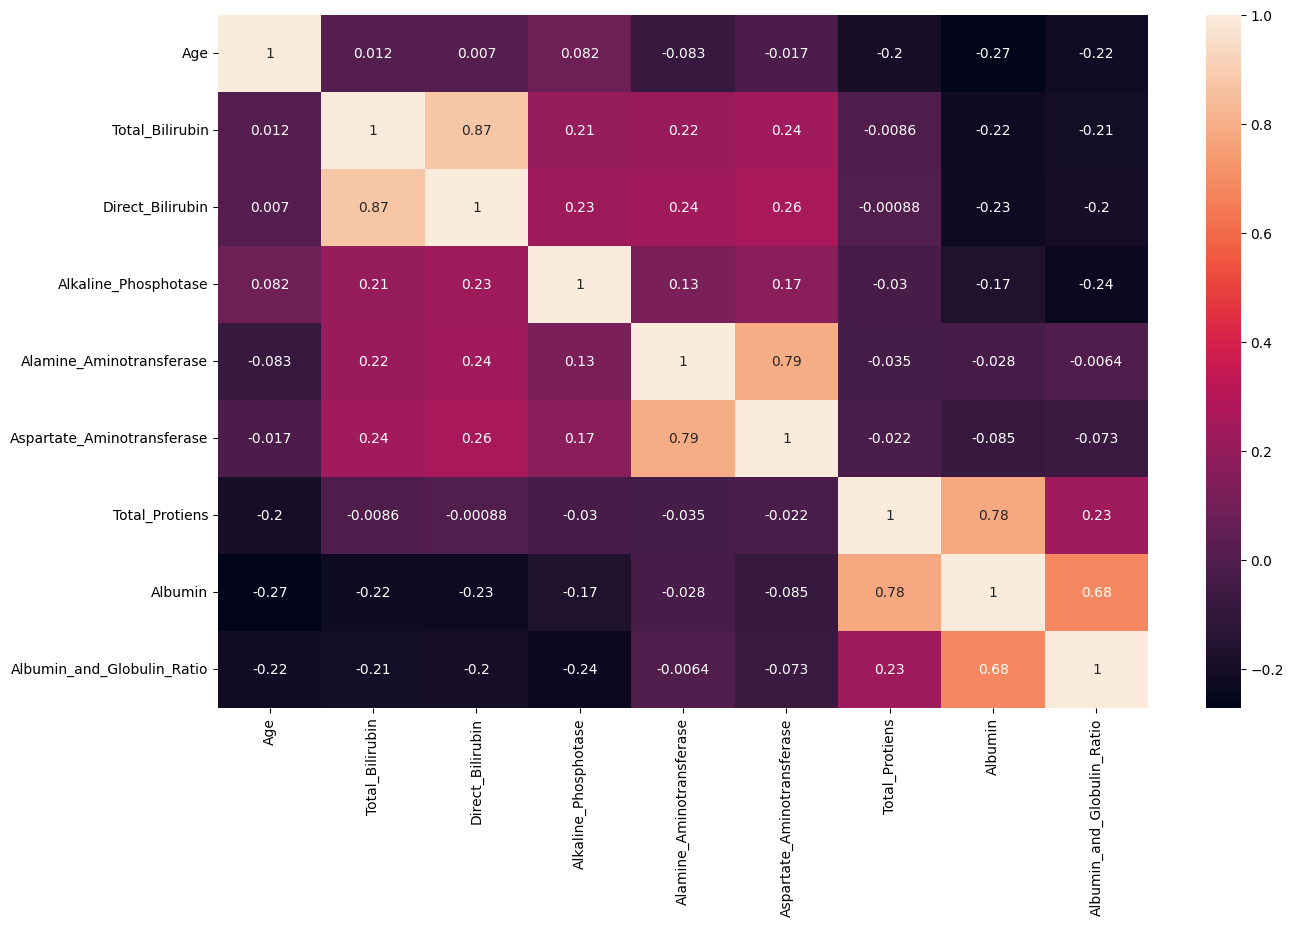

In [14]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.drop(columns=['Gender', 'Dataset']).corr(),annot=True)
plt.show()

In [15]:
df['Dataset'].unique()

array([1, 2])

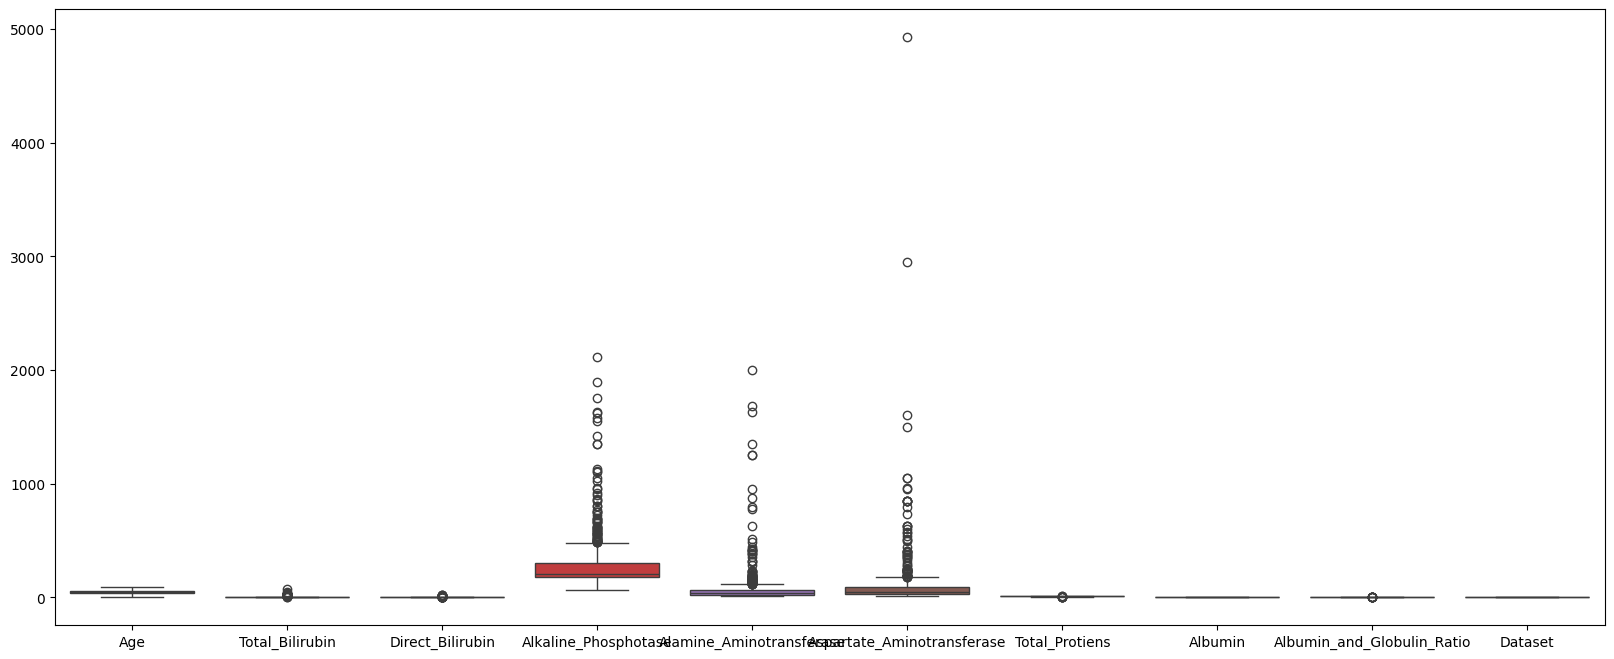

In [16]:
plt.figure(figsize=(20, 8))
sns.boxplot(df)
plt.show()

## Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Gender_encoded'] = encode.fit_transform(df['Gender'])

In [18]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_encoded
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [19]:
df_new = df.drop('Gender', axis=1)

In [20]:
X = df_new.drop(['Dataset'], axis=1)
y = df_new['Dataset']

In [21]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_encoded'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4149)

In [25]:
from sklearn.preprocessing import StandardScaler
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('/config/workspace/model/train.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [26]:
X_train, X_test = scaler_standard(X_train, X_test)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LReg = LogisticRegression()
LReg.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred_1 = LReg.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_1)
print('Logistic Regression Accuracy Score:', accuracy)

Logistic Regression Accuracy Score: 0.8070175438596491


In [32]:
score=[]
for i in range(5000):
  X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=i,test_size=0.30)
  LReg.fit(X_train,y_train)
  y_pred = LReg.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))

/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [33]:
np.argmax(score)

4149

### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred_2 = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_2)
print('KNN Accuracy Score:', accuracy_knn)

KNN Accuracy Score: 0.6608187134502924


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred_3 = DTree.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_3)
print('Decision Tree Accuracy Score:', accuracy_DT)

Decision Tree Accuracy Score: 0.6198830409356725


### SVC

In [38]:
from sklearn.svm import SVC
svm= SVC(kernel='linear') 
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
y_pred_4 = svm.predict(X_test)
accuracy_SVC = accuracy_score(y_test, y_pred_4)
print('Support Vector Machine Accuracy Score:', accuracy_SVC)

Support Vector Machine Accuracy Score: 0.6900584795321637


### Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred_5 = nb.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred_5)
print('Accuracy Score:', accuracy_NB)

Accuracy Score: 0.6023391812865497


- Logistic Regression Accuracy Score: 0.8070175438596491
- KNN Accuracy Score: 0.6608187134502924
- Decision Tree Accuracy Score: 0.6198830409356725
- SVC Accuracy Score: 0.6900584795321637
- Naive Bayes Accuracy Score: 0.6023391812865497

## Logistic Regression Accuracy Score: 0.8070175438596491 are the best ones! (80%)

In [42]:
import pickle
file = open('/config/workspace/model/modelPredict.pkl','wb')
pickle.dump(LReg,file)
file.close()

In [43]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset', 'Gender_encoded'],
      dtype='object')